# Práctica Interpolación

**Nombre :** Jesús Muñoz Velasco

Se desea construir un gráfico en el que se incluyan la función interpolada

$$
    f(x) = \frac{1}{1+x^2}
$$

y las gráficas de los polinomios de grados 10, 20 y 30 que interpolan a f en puntos equiespaciados del intervalo $[−5, 5]$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio 1:** Construya un array que contenga un conjunto de $n$ puntos equiespaciados del intervalo $[−5, 5]$.

In [15]:
n=5  #Número de puntos del array 'puntos'
puntos=np.linspace(-5,5,n)

**Ejercicio 2:** Construya un array que contenga las imágenes mediante f de los puntos anteriores

In [16]:
def f(x):
    return (1/(1+x**2))

imagenes=f(puntos)

**Ejercicio 3:** Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver solo los coeficientes del polinomio de interpolación en su forma de Newton.

In [17]:
def D(x,y):
    n=len(x)
    D=np.zeros([n,n+1]) #creo un array vacío
    
    for i in range (n):   #Las 2 primeras columnas de la tabla son x e y
        D[i,0]=x[i] 
        D[i,1]=y[i]
    
    for j in range (2,n+1):
        for i in range (n-j+1):
            D[i,j]=((D[i+1,j-1]-D[i,j-1])/(D[i+j-1,0]-D[i,0]))
                                               
    return (D[0,1:]) #Devuelvo solo el equivalente a la diagonal superior cuando se aplica el algoritmo

D(puntos,imagenes)

array([ 0.03846154,  0.0397878 ,  0.06100796, -0.0265252 ,  0.00530504])

**Ejercicio 4:** Construya una función en Python que a partir del array de puntos y del array de coeficientes proporcione el valor del polinomio interpolación de Newton en un punto x mediante el algoritmo de Newton-Horner.

In [20]:
def Newton_Horner(x,D,punto):
    n=len(D)-1
    b=D[n]
    
    for i in range (1,n+1):
        b=(b*(punto-x[n-i])+D[n-i])
        
    return b

**Ejercicio 5:** Utilice la función anterior para construir la gráfica pedida.

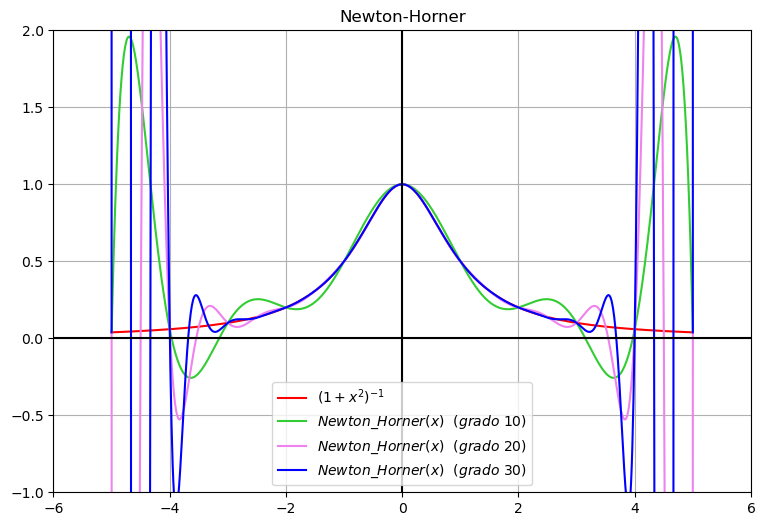

In [22]:
v2=1000 #Número de puntos para la representación
array=np.linspace(-5,5,v2)

n1=11
x1=np.linspace(-5,5,n1) #vector creado para el cálculo del polinomio de Newton-Horner de grado n1 (10)
y1=f(x1)

n2=21
x2=np.linspace(-5,5,n2) #vector creado para el cálculo del polinomio de Newton-Horner de grado n2 (20)
y2=f(x2)

n3=31
x3=np.linspace(-5,5,n3) #vector creado para el cálculo del polinomio de Newton-Horner de grado n3 (30)
y3=f(x3)


plt.figure(figsize=(9,6))
plt.title("Newton-Horner")
plt.plot(array,f(array),'r',label="$(1+x^2)^{-1}$")
#plt.plot(array,Newton_Horner(puntos,imagenes,array),'b',label= f"$Newton\_Horner(x)\,\,\,\, ({n} \,\,puntos)$")

plt.plot(array,Newton_Horner(x1,D(x1,y1),array),'limegreen',label= f"$Newton\_Horner(x)\,\,\,\, (grado \,\,{n1-1})$")
plt.plot(array,Newton_Horner(x2,D(x2,y2),array),'violet',label= f"$Newton\_Horner(x)\,\,\,\, (grado \,\,{n2-1})$")
plt.plot(array,Newton_Horner(x3,D(x3,y3),array),'blue',label= f"$Newton\_Horner(x)\,\,\,\, (grado \,\,{n3-1} )$")


plt.legend()
plt.grid()
plt.ylim(-1,2)
plt.xlim(-6,6)
plt.plot([0,0],[-1,2],'k')
plt.plot([-6,6],[0,0],'k')

plt.show()